In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import tensorflow.keras
import random
from scipy.stats import norm 
import seaborn as sns
import math as m

In [2]:
df = pd.read_csv('./stroke_recurr.csv', na_values='unknown')

In [3]:
df.dropna(axis=1, thresh=(0.2*len(df)), inplace=True)

In [4]:
df.columns

Index(['id', 'Age', 'Ethnic group', 'Sex', 'Occupation',
       'Alternate phone number.1', 'Date of recover',
       'Date of hospitalization', 'Area of residence', 'Marriage status',
       'Education level', 'Stroke history in familty', 'TIA',
       'No of Stroke/TIA', 'Alcohol', 'Myocardial Infarction',
       'Physical exercise', 'Poor diet (salty, fatty food)', 'Smoking',
       'History-Hypertension', 'History-Diabetes', 'Setting of stroke',
       'Paralysis', 'Incontinence', 'Systolic BP at hospitalization',
       'Diastolic BP at hospitalization', 'Systolic HBP', 'Diastolic HBP',
       'Diabetes', 'Heart failure', 'Benh than man',
       'Glasgow at Hospitalization', 'Rankin', 'ESSEN:', 'SPI-II:',
       'Neutrophil', 'Hct (%)', 'Platelet', 'Glycemia', 'hba1c',
       'Fibrinogen (g/l):', 'hs-CRP (mg/l):', 'Dyslipidemia',
       'Cholestorl total', 'Triglyceride', 'HDL-C', 'LDL-C',
       'Atrial fibrillation', 'Mitral stenosis', 'Ventricular hypertropy',
       'clot in v

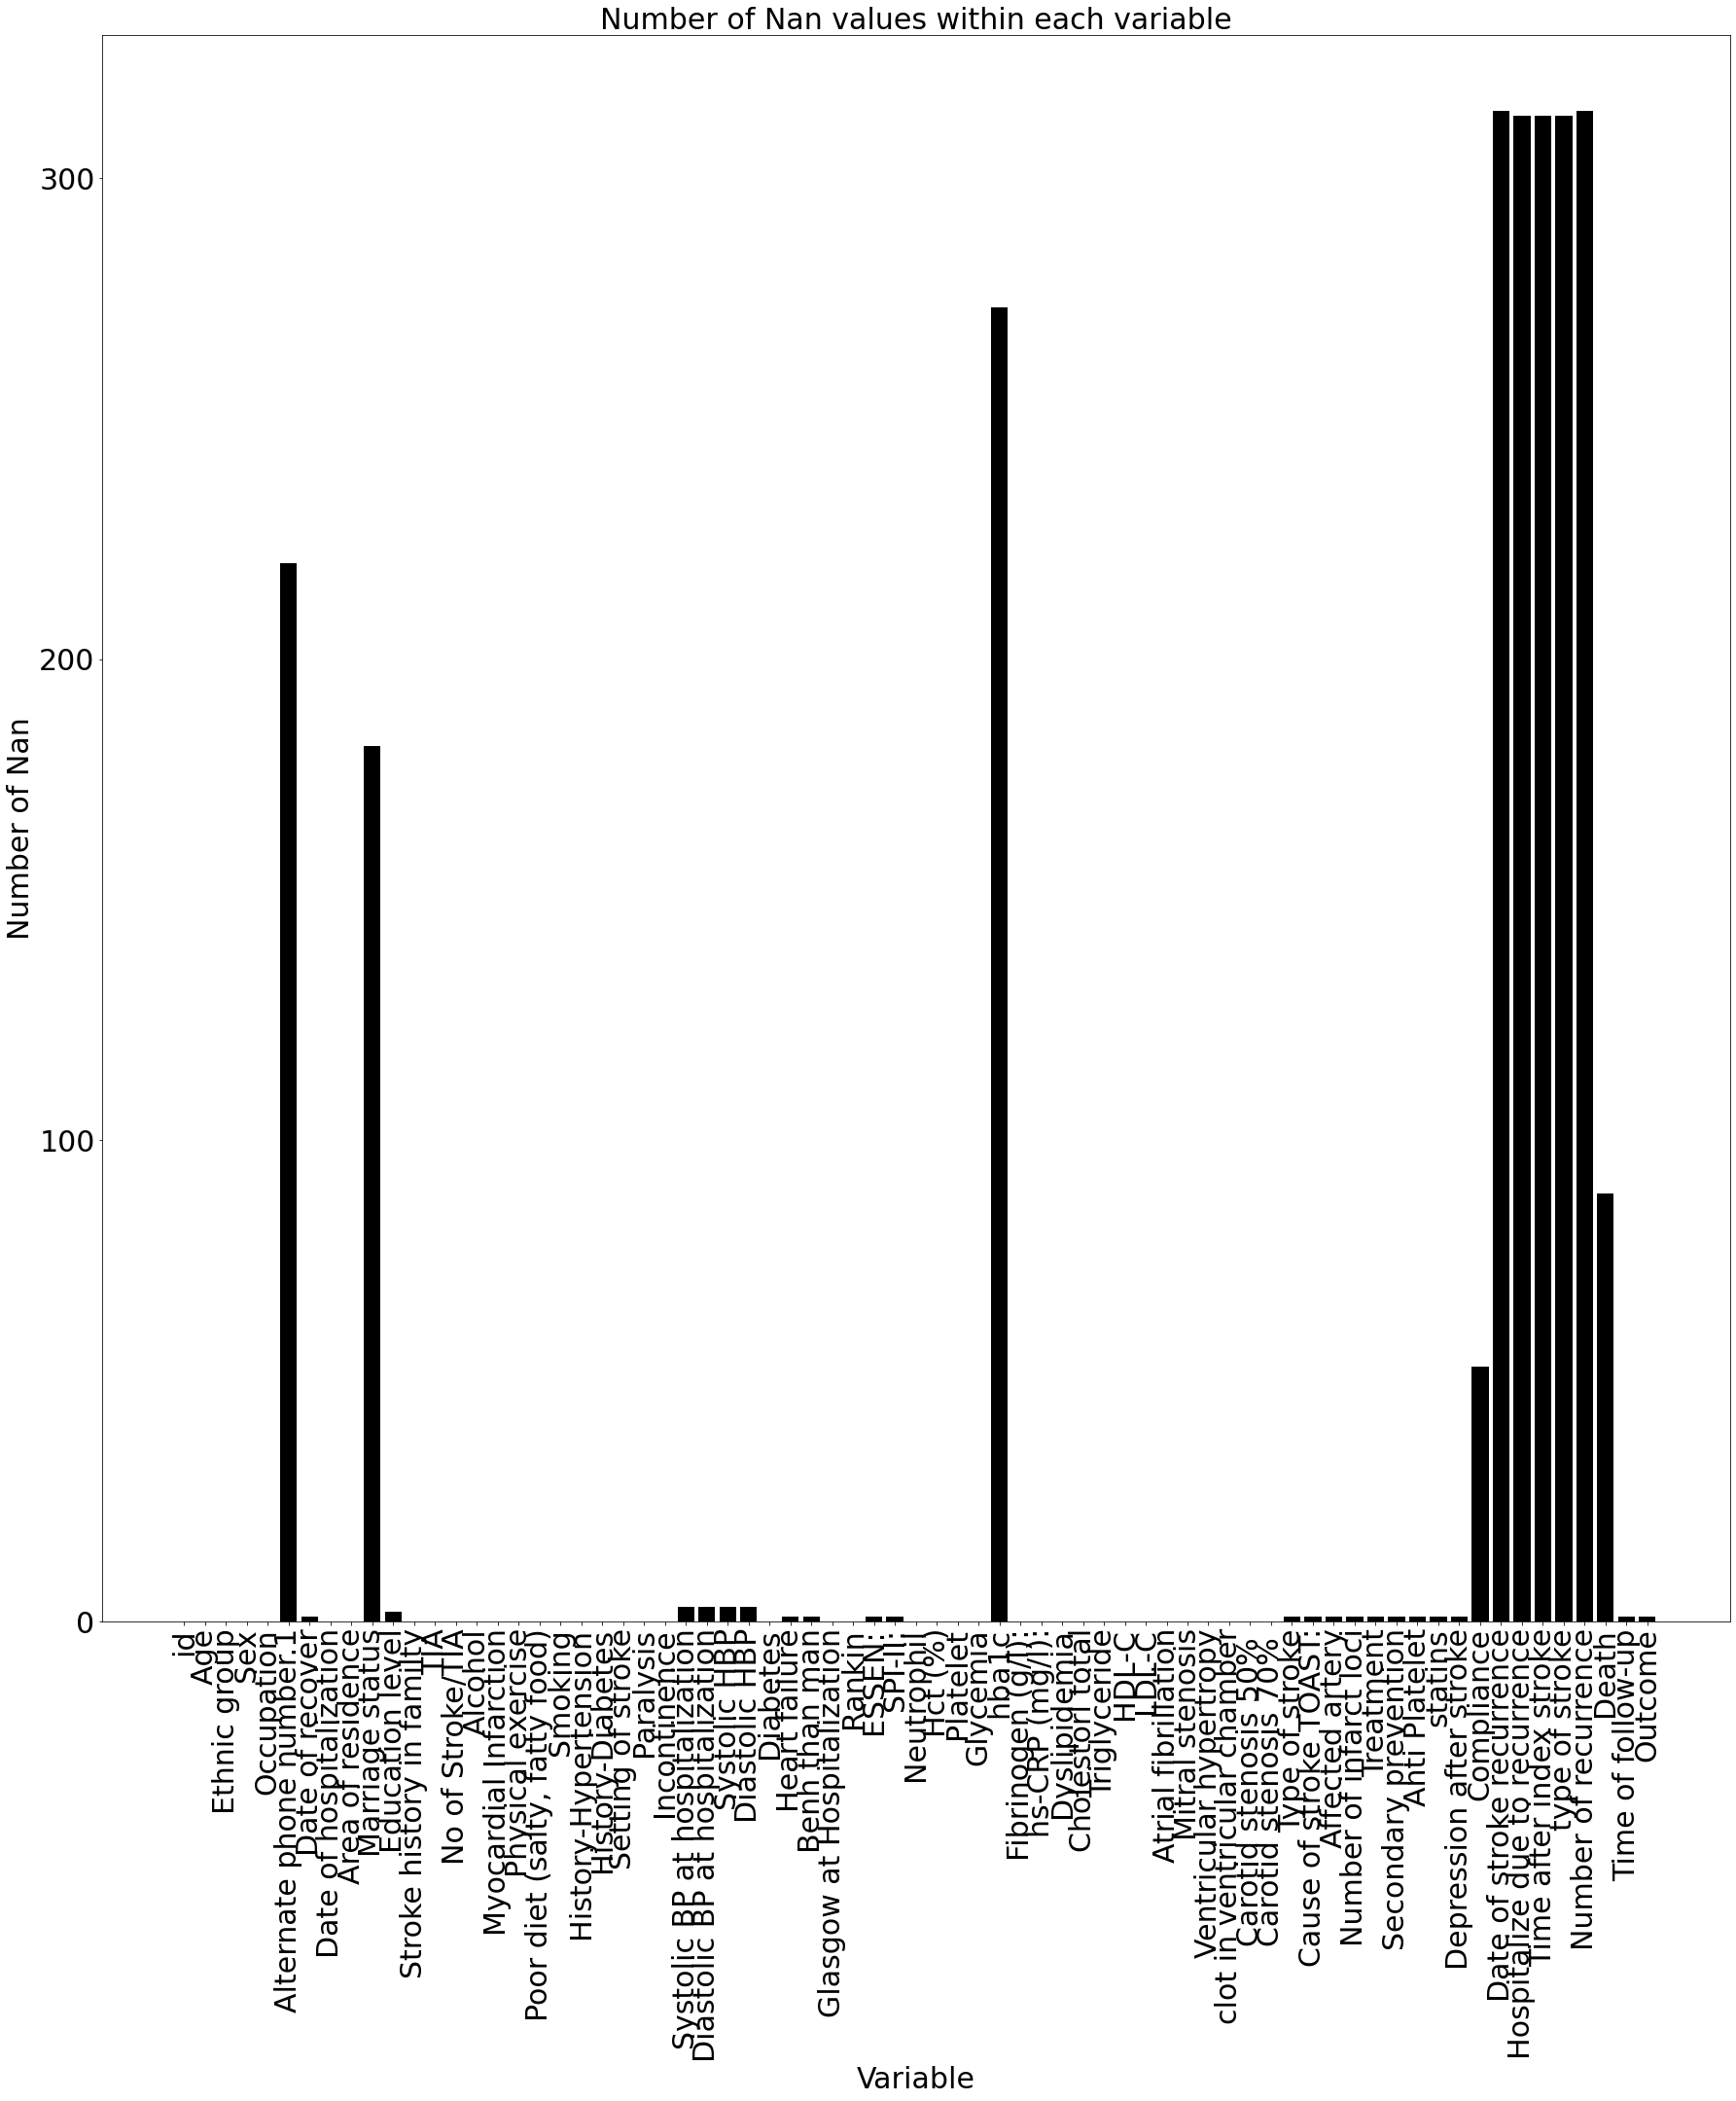

In [5]:
columns = df.columns

col = df.iloc[:,:].isna().sum()
plt.figure(figsize=(30,30))
plt.tick_params(labelsize=30)
plt.title('Number of Nan values within each variable', fontsize=30)
plt.yticks(np.arange(0,max(col), step=100))
plt.xticks(rotation=90)
plt.xlabel('Variable', fontsize=30)
plt.ylabel('Number of Nan', fontsize=30)
plt.bar(columns, col, color = 'k')
plt.savefig('./Nans recurr.jpg')

In [6]:
def hist_gen(df, column, colours, bins_val=5):
    
    assert type(colours) is list, 'Not a list'
    assert type(df).__name__ == 'DataFrame'
    assert type(column) is str

    
    plt.figure(figsize=(20,10))
    plt.grid(False)
    n, bins, patches = plt.hist(df[column], bins=bins_val)
    
    if len(colours) < len(patches):
        print('Warning: There should be the same number of colours as bars if more colours are needed')
        x = -(-len(patches)//len(colours)) # round always rounds down and so does //, therefore using
        # a negative value will always round up
        colours = colours*x
    
    for i in range(len(patches)):
        c = colours[i]
        patches[i].set_fc(c)
    
    #plt.ylim(max(df[column]) + (max(df[column])*0.4))
    plt.tick_params(labelsize=20)
    plt.xlabel(f'{column}', fontsize=20)
    plt.ylabel(f'Number of elements within {column}', fontsize=20)
    plt.title(f'Distribution of {column}', fontsize=20)
    
    plt.savefig(f'Distribution of {column}'+ '.jpg', dpi=96)

In [7]:
df = df[['Age', 'Stroke history in familty', 'TIA', 'No of Stroke/TIA', 'Alcohol',
       'Myocardial Infarction', 'Physical exercise', 'Smoking', 'Sex', 'History-Hypertension',
       'Poor diet (salty, fatty food)', 'Smoking', 'History-Hypertension',
       'History-Diabetes', 'Diabetes', 'Heart failure', 'Glasgow at Hospitalization', 'Rankin', 'Neutrophil', 'Hct (%)', 'Platelet', 'Glycemia',
       'Fibrinogen (g/l):', 'hs-CRP (mg/l):', 'Dyslipidemia',
       'Cholestorl total', 'Triglyceride', 'HDL-C', 'LDL-C',
       'Atrial fibrillation','Number of recurrence']]
#, 'Depression after stroke'

In [8]:
features = df.drop(columns=['Number of recurrence'])
target = df[['Number of recurrence']]
target.fillna(0,inplace=True)

/tmp/ipykernel_353564/725043947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.fillna(0,inplace=True)


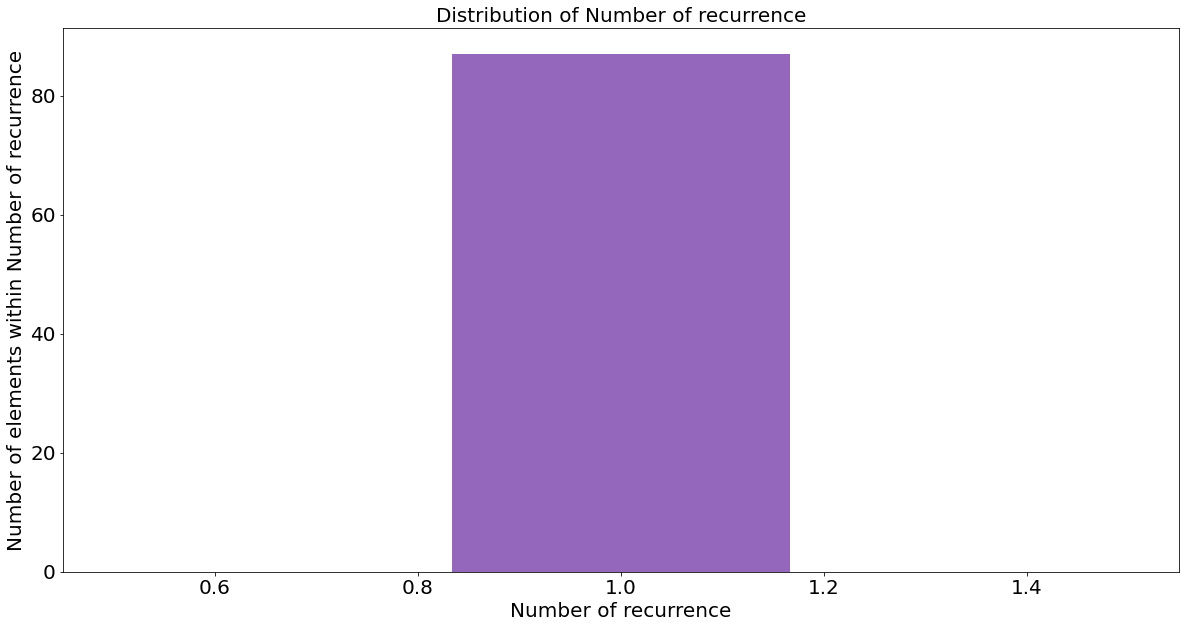

In [9]:
features.fillna(2,inplace=True)
hist_gen(df,'Number of recurrence', ['tab:purple'], 3)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features[['Age', 'Fibrinogen (g/l):', 'hs-CRP (mg/l):', 'Cholestorl total', 'Triglyceride', 'HDL-C', 'LDL-C']] = scaler.fit_transform(features[['Age', 'Fibrinogen (g/l):', 'hs-CRP (mg/l):', 'Cholestorl total', 'Triglyceride', 'HDL-C', 'LDL-C']])

In [55]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(features, 
                                                                                  target,
                                                                                  test_size=0.4,
                                                                                  shuffle=True)

In [56]:
from sklearn import ensemble
randForest = ensemble.RandomForestClassifier(n_estimators=10, criterion='entropy')
randForest = randForest.fit(train_data, train_label)

/tmp/ipykernel_353564/2429238953.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randForest = randForest.fit(train_data, train_label)


In [57]:
randForest_pred = randForest.predict(test_data)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
randForest_accuracy = accuracy_score(test_label, randForest_pred)
randForest_accuracy *= 100
print('Accuracy of the best Decision tree model from the Random Forest is %.2f' % randForest_accuracy)

Accuracy of the best Decision tree model from the Random Forest is 78.26


In [68]:
print(randForest_pred, list(test_label.iloc[:,0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0

In [69]:
randForest_conf_matrix = confusion_matrix(test_label, randForest_pred)
randForest_conf_matrix

array([[122,   5],
       [ 30,   4]])

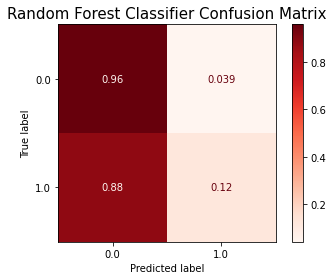

In [84]:
ConfusionMatrixDisplay.from_predictions(test_label,randForest_pred, cmap=plt.cm.Reds, normalize='true')

plt.title('Random Forest Classifier Confusion Matrix', fontsize=15)
plt.savefig('./randforest Confusion Matrix.jpg', dpi=900)

In [61]:
from sklearn.svm import SVC
import time
timer = time.time()
svc_model = SVC()
svc_model = svc_model.fit(train_data, train_label)
time.time() - timer

/home/brugha/tfvenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01021265983581543

In [62]:
svc_preds = svc_model.predict(test_data)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(test_label, svc_preds)
svc_conf = confusion_matrix(test_label, svc_preds)
print(accuracy*100, '\n',svc_conf)

78.88198757763976 
 [[127   0]
 [ 34   0]]


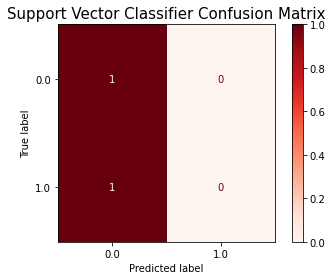

In [86]:
ConfusionMatrixDisplay.from_predictions(test_label,svc_preds, cmap=plt.cm.Reds, normalize='true')

plt.title('Support Vector Classifier Confusion Matrix', fontsize=15)
plt.savefig('./SVC Confusion Matrix.jpg', dpi=900)